In [1]:
# MACHINE LEARNING CAPSTONE PROJECT
# Author - Katelynn Auer
# Computer Science Capstone – C964

In [2]:
#Filters out deprecation warnings for packages that do not affect functionality
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation 
deprecation._PRINT_DEPRECATION_WARNINGS = False
#Allows us to resize the images
import cv2
#Allows us to define our neural network
import tflearn 
#Allows us to work with arrays
import numpy as np 
#Allows us to work with our directories
import os 
#Allows us to mixup the currently ordered data / Allows us to train our data
from random import shuffle 
#Allows us to visualize percentage bars for tasks
from tqdm import tqdm 
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


#Paste from directories to load training and validation data sets
train_dir = 'dataset_dogs_vs_cats/train'
validation_dir = 'dataset_dogs_vs_cats/validation'

#TensorBoard log directory
#tb_dir = 'log'

#Cleans data / Creates consistent data by changing size
img_size = 50

#Learn_rate and Dropout_rate affects the accuracy of the network and can be adjusted
learn_rate = 0.001
dropout_rate = 0.8

#Model is built based on Learn_rate, Dropout_rate and Convolution count
model_name = 'dogsvscats-{}-{}-{}.model'.format(dropout_rate, learn_rate, '8conv-basic-vide')

#Curses warnings may be disregarded as it has no effect on output

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
#Labeling for if dog or cat
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return[1,0]
    elif word_label == 'dog': return[0,1]
    

In [4]:
#Construction of the array for the create_training_data
def create_training_data():
    training_data = []
    for img in tqdm(os.listdir(train_dir)):
        label = label_img(img)
        path = os.path.join(train_dir,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size,img_size))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('trained_data.npy', training_data)
    return training_data

In [5]:
#Construction of the array / Includes data cleaning for the testing dataset
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(validation_dir)):
        path = os.path.join(validation_dir,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size, img_size))
        testing_data.append([np.array(img),img_num])
    np.save('test_data.npy', testing_data)
    return testing_data

In [6]:
#Variable assignment for trained_data equivalent to the array by running module create_training_data
trained_data = create_training_data()

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:33<00:00, 751.08it/s]


In [7]:
#Convolutional neural network which utilizes the variables of 'image size' defined in code cell one
#Number of Convolutions can be adjusted for network learning
convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

# convnet = conv_2d(convnet, 32, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)

# convnet = conv_2d(convnet, 64, 5, activation='relu')
# convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, dropout_rate)

convnet = fully_connected(convnet, 2, activation='softmax')
#Categorical Cross Entropy for Machine Learning / Can be adjusted for network learning
#Adam Optimization Algorithm for Deep Learning / Can be adjusted for network learning
convnet = regression(convnet, optimizer='adam', learning_rate=learn_rate, loss='categorical_crossentropy', name='targets')

#Tensorboard directory storage for flexibility and visualization
model = tflearn.DNN(convnet, tensorboard_dir='log')

In [8]:
#Creates a check for model path / If existing path, it will load the path
if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)

INFO:tensorflow:Restoring parameters from C:\Users\Katel\Desktop\KatelynnAuerC964\dogsvscats-0.8-0.001-8conv-basic-vide.model


In [9]:
#Validates the accuracy for training the network by using the last 1000 images
train = trained_data[:-1000]
test = trained_data[-1000:]

In [10]:
#Construction of arrays for reshaped images
X = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, img_size, img_size, 1)
test_y = [i[1] for i in test]

In [11]:
#Specify the number of n_epochs that you would like to use to train the model / Runs the model
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 4499  | total loss: 0.21296 | time: 17.770s
| Adam | epoch: 003 | loss: 0.21296 - acc: 0.9125 -- iter: 23936/24000
Training Step: 4500  | total loss: 0.20357 | time: 18.819s
| Adam | epoch: 003 | loss: 0.20357 - acc: 0.9182 | val_loss: 0.34270 - val_acc: 0.8650 -- iter: 24000/24000
--


In [12]:
#Creates a save for the name of the model
model.save(model_name)

INFO:tensorflow:C:\Users\Katel\Desktop\KatelynnAuerC964\dogsvscats-0.8-0.001-8conv-basic-vide.model is not in all_model_checkpoint_paths. Manually adding it.


100%|███████████████████████████████████████████████████████████████████████| 12500/12500 [00:15<00:00, 784.05it/s]


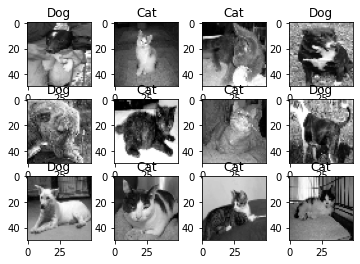

In [13]:
#Shows images based on 50x50 grayscale
import matplotlib.pyplot as plt

test_data = process_test_data()
# test_data = np.load('test_data.npy')

%matplotlib inline
fig = plt.figure()

for num, data in enumerate(test_data[:12]):
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
plt.show()